# Putting all code together

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# import utility libraries
import util
import preprocessing
import importlib

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Pool size changed, may indicate binary incompatibility. Expected 48 from C header, got 64 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Address size changed, may indicate binary incompatibility. Expected 24 from C header, got 40 from PyObject
  return f(*args, **kwds)


NLP_Task ready to use.


In [4]:
import nlp_util

In [5]:
nlp_task = nlp_util.NLP_Task()

NLP_Task ready to use.


# Load Files

In [6]:
# load files
tr_file, va_file, te_file = util.load_files()
tr_dict = util.tsv_to_dict(tsv_file=tr_file)
va_dict = util.tsv_to_dict(tsv_file=va_file)
te_dict = util.tsv_to_dict(tsv_file=te_file)

# Preprocess Files

In [7]:
tr_file['preprocessed'] = preprocessing.preprocessing_txt(dataset=tr_file)
va_file['preprocessed'] = preprocessing.preprocessing_txt(dataset=va_file)
te_file['preprocessed'] = preprocessing.preprocessing_txt(dataset=te_file)

In [8]:
np.unique(tr_file['Label'])

array(['barely-true', 'false', 'half-true', 'mostly-true', 'pants-fire',
       'true'], dtype=object)

# Distribution of the data

In [9]:
import plotting_util
importlib.reload(plotting_util)

<module 'plotting_util' from 'D:\\UIC\\Fall 2018\\Statistical NLP\\Project\\jurat-aldo-project\\cs-521-project.git\\source\\CS-521-PROJECT\\plotting_util.py'>

In [10]:
data_by_label = [len(tr_file['Label'].values[tr_file['Label'] == 'false']),
                len(tr_file['Label'].values[tr_file['Label'] == 'true']),
                len(tr_file['Label'].values[tr_file['Label'] == 'barely-true']),
                len(tr_file['Label'].values[tr_file['Label'] == 'half-true']),
                len(tr_file['Label'].values[tr_file['Label'] == 'mostly-true']),
                len(tr_file['Label'].values[tr_file['Label'] == 'pants-fire'])
                ]
data_labels = ['false', 'true','barely-true','half-true','mostly-true','pants-fire']

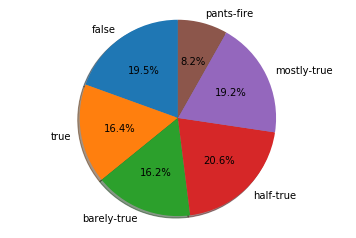

In [11]:
#bar_plot = plotting_util.plot_bar_chart(chartname='Liar liar dataset distribution', barnames=data_labels, barvalues=data_by_label,
#                             barcolors=['skyblue'])
#plt.plot()
pie_plot = plotting_util.plot_pie_chart(chartname='myplot', labels=data_labels, values=data_by_label)
plt.show()

# Extract Features

### Extracting POS tags grouped by unigrams, bigrams and trigrams

In [12]:
# POS extracted from no preprocessed data for training, validation and testing files
unigram_pos, bigrams_pos, trigram_pos = preprocessing.extract_POS(statements=tr_dict['statement'])
unigram_pos_va, bigrams_pos_va, trigram_pos_va = preprocessing.extract_POS(statements=va_dict['statement'])
unigram_pos_te, bigrams_pos_te, trigram_pos_te = preprocessing.extract_POS(statements=te_dict['statement'])

Extracting POS Tags
Finished
Extracting POS Tags
Finished
Extracting POS Tags
Finished


In [13]:
# Pos extracted from preprocessed data for training, validation and testing files
unigram_pos_p, bigrams_pos_p, trigram_pos_p = preprocessing.extract_POS(tr_file['preprocessed'].values)
unigram_pos_p_va, bigrams_pos_p_va, trigram_pos_p_va = preprocessing.extract_POS(va_file['preprocessed'].values)
unigram_pos_p_te, bigrams_pos_p_te, trigram_pos_p_te = preprocessing.extract_POS(te_file['preprocessed'].values)

Extracting POS Tags
Finished
Extracting POS Tags
Finished
Extracting POS Tags
Finished


### Get unique values for unigrams, bigrams and trigrams

In [14]:
# Unique list of unigrams, bigrams and trigrams for no preprocessed data
unigram_list_tr = nlp_task.UniquePosTags(unigram_pos)
bigram_list_tr = nlp_task.UniquePosTags(bigrams_pos)
trigram_list_tr = nlp_task.UniquePosTags(trigram_pos)

In [15]:
# Unique list of unigrams, bigrams and trigrams for preprocessed data
unigram_list_tr_processed = nlp_task.UniquePosTags(unigram_pos_p)
bigram_list_tr_processed = nlp_task.UniquePosTags(bigrams_pos_p)
trigram_list_tr_processed = nlp_task.UniquePosTags(trigram_pos_p)

### Removing duplicated POS in bigrams and trigrams [NNP and CD]

For example: The/DT economy/NN bled/VBD $/$ 24/CD billion/CD due/JJ to/TO the/DT government/NN shutdown/NN ./. <br>
In this case having CD_CD is the same as having only CD<br>
Same with: <br>
U.S./NNP Rep./NNP Ron/NNP Kind/NNP ,/, D-Wis./NNP ,/, and/CC his/PRP$ fellow/JJ Democrats/NNS went/VBD on/IN a/DT spending/NN spree/NN and/CC now/RB their/PRP$ credit/NN card/NN is/VBZ maxed/VBN out/RP <br>
We don't need all those NNPs to find a pattern and it might be noisy to the ML algorithm<br>

In [16]:
# For raw data

list_to_remove = ['NNP','CD']
# Training
removed_pos = nlp_task.RemoveConsecutiveTags(list_to_remove,unigram_pos)
removed_pos_bigrams = nlp_task.POS_groupping(grams=2,sentences_pos=removed_pos)
removed_pos_trigrams = nlp_task.POS_groupping(grams=3,sentences_pos=removed_pos)

# Validdation
removed_pos_va =  nlp_task.RemoveConsecutiveTags(list_to_remove,unigram_pos_va)
removed_pos_bigrams_va = nlp_task.POS_groupping(grams=2,sentences_pos=removed_pos_va)
removed_pos_trigrams_va = nlp_task.POS_groupping(grams=3,sentences_pos=removed_pos_va)

# Testing
removed_pos_te =  nlp_task.RemoveConsecutiveTags(list_to_remove,unigram_pos_te)
removed_pos_bigrams_te = nlp_task.POS_groupping(grams=2,sentences_pos=removed_pos_te)
removed_pos_trigrams_te = nlp_task.POS_groupping(grams=3,sentences_pos=removed_pos_te)

#LIST OF UNIQUE BIGRAMS AND TRIGRAMS AFTER REMOVING CONSECUTIVE SAME TAGS
removed_unique_bigrams = nlp_task.UniquePosTags(postags=removed_pos_bigrams)
removed_unique_trigrams = nlp_task.UniquePosTags(postags=removed_pos_trigrams)

In [17]:
# For processed data
list_to_remove = ['NNP','CD']
# Training
removed_pos_p = nlp_task.RemoveConsecutiveTags(list_to_remove,unigram_pos_p)
removed_pos_bigrams_p = nlp_task.POS_groupping(grams=2,sentences_pos=removed_pos_p)
removed_pos_trigrams_p = nlp_task.POS_groupping(grams=3,sentences_pos=removed_pos_p)

# Validdation
removed_pos_va_p =  nlp_task.RemoveConsecutiveTags(list_to_remove,unigram_pos_p_va)
removed_pos_bigrams_va_p = nlp_task.POS_groupping(grams=2,sentences_pos=removed_pos_va_p)
removed_pos_trigrams_va_p = nlp_task.POS_groupping(grams=3,sentences_pos=removed_pos_va_p)

# Testing
removed_pos_te_p =  nlp_task.RemoveConsecutiveTags(list_to_remove,unigram_pos_p_te)
removed_pos_bigrams_te_p = nlp_task.POS_groupping(grams=2,sentences_pos=removed_pos_te_p)
removed_pos_trigrams_te_p = nlp_task.POS_groupping(grams=3,sentences_pos=removed_pos_te_p)

#LIST OF UNIQUE BIGRAMS AND TRIGRAMS AFTER REMOVING CONSECUTIVE SAME TAGS
removed_unique_bigrams_p = nlp_task.UniquePosTags(postags=removed_pos_bigrams_p)
removed_unique_trigrams_p = nlp_task.UniquePosTags(postags=removed_pos_trigrams_p)

### Add numerical labels for each of the sentence in the datasets

In [18]:
# Labels for multiclassification and binary classification tasks
multi_labels = {'false':0, 'true':1,'pants-fire':2,'barely-true':3,'half-true':4,'mostly-true':5}
binary_labels = {'false':1, 'true':-1,'pants-fire':1,'barely-true':1,'half-true':0,'mostly-true':-1}


tr_file['b_label'] = np.array(preprocessing.create_labels(labels=tr_file['Label'].values,label_values=binary_labels))
va_file['b_label'] = np.array(preprocessing.create_labels(labels=va_file['Label'].values,label_values=binary_labels))
te_file['b_label'] = np.array(preprocessing.create_labels(labels=te_file['Label'].values,label_values=binary_labels))

tr_file['m_label'] = np.array(preprocessing.create_labels(labels=tr_file['Label'].values,label_values=multi_labels))
va_file['m_label'] = np.array(preprocessing.create_labels(labels=va_file['Label'].values,label_values=multi_labels))
te_file['m_label'] = np.array(preprocessing.create_labels(labels=te_file['Label'].values,label_values=multi_labels))

### Drop unnecesary columns from dataframes

In [19]:
# Once this code is executed and you try to re run it again it is going to show an error because columns already were remoded
unnecesary_columns = ['BT', 'FC', 'HT', 'MT', 'PF']
tr_file = tr_file.drop(unnecesary_columns, axis=1)
va_file = va_file.drop(unnecesary_columns, axis=1)
te_file = te_file.drop(unnecesary_columns, axis=1)

### Extract POS features from dataset

In [20]:
importlib.reload(preprocessing)

NLP_Task ready to use.


<module 'preprocessing' from 'D:\\UIC\\Fall 2018\\Statistical NLP\\Project\\jurat-aldo-project\\cs-521-project.git\\source\\CS-521-PROJECT\\preprocessing.py'>

After having ran some experiments with decision trees regarding POS we came up with a list of POS unigrams, bigrams and trigrams that were more relevant for classifying mostly ture and mostly false news.
<br>
POS unigrams: ['VBZ', 'DT', 'NNPS', 'VBP', 'JJ', 'IN', 'WRB', 'VBD', 'PRP', 'RP', 'WDT', 'VB', 'NNP', 'VBG', 'PRP$', 'VBN', 'CD', 'RB', 'WP', 'JJS', 'JJR', 'EX', 'RBS', 'FW', 'LS']
 <br>
POS brigrams: ['NNPS_VBP', 'VB_NNP', 'IN_DT', 'VB_JJ', 'JJ_CD', 'CD_NNS', 'DT_JJS', 'JJR_IN', 'IN_CD', 'CC_IN', 'RB_VBD', 'CD_NN', 'NN_TO', 'JJR_JJ', 'VB_CD'] <br>
POS trigrams: ['VBD_VBN_IN', 'IN_DT_JJ', 'CD_NN_IN', 'IN_CD_NNS', 'IN_DT_NN', 'DT_JJ_CD', 'MD_VB_IN', 'JJS_JJ_NN', 'CC_JJ_NNS', 'JJ_NNS_VBP', 'VBP_CD_NN', 'NNS_,_CD', 'sos_JJR_IN', 'IN_DT_NNS','JJ_NN_MD'] <br>

In [21]:
pos_relevant_unigrams =  ['VBZ', 'DT', 'NNPS', 'VBP', 'JJ', 'IN', 'WRB', 'VBD', 'PRP', 'RP', 'WDT', 'VB', 'NNP', 'VBG', 'PRP$', 'VBN', 'CD', 'RB', 'WP', 'JJS', 'JJR', 'EX', 'RBS', 'FW', 'LS'] 
pos_relevant_bigrams = ['NNPS_VBP', 'VB_NNP', 'IN_DT', 'VB_JJ', 'JJ_CD', 'CD_NNS', 'DT_JJS', 'JJR_IN', 'IN_CD', 'CC_IN', 'RB_VBD', 'CD_NN', 'NN_TO', 'JJR_JJ', 'VB_CD'] 
pos_relevant_trigrams = ['VBD_VBN_IN', 'IN_DT_JJ', 'CD_NN_IN', 'IN_CD_NNS', 'IN_DT_NN', 'DT_JJ_CD', 'MD_VB_IN', 'JJS_JJ_NN', 'CC_JJ_NNS', 'JJ_NNS_VBP', 'VBP_CD_NN', 'sos_JJR_IN', 'IN_DT_NNS','JJ_NN_MD'] 

In [22]:
Xtr_onehot_unigram, Xtr_count_unigram, Xtr_tfidf_unigram, Xval_onehot_unigram, Xval_count_unigram, Xval_tfidf_unigram, Xte_onehot_unigram, Xte_count_unigram, Xte_tfidf_unigram = util.GetFeaturesFromPOS(training_data=unigram_pos_p, validation_data=unigram_pos_p_va, testing_data=unigram_pos_p_te, user_defined_vocabulary=pos_relevant_unigrams)

{'vbz': 0, 'dt': 1, 'nnps': 2, 'vbp': 3, 'jj': 4, 'in': 5, 'wrb': 6, 'vbd': 7, 'prp': 8, 'rp': 9, 'wdt': 10, 'vb': 11, 'nnp': 12, 'vbg': 13, 'prpdollar': 14, 'vbn': 15, 'cd': 16, 'rb': 17, 'wp': 18, 'jjs': 19, 'jjr': 20, 'ex': 21, 'rbs': 22, 'fw': 23, 'ls': 24}


In [23]:
sum(Xtr_onehot_unigram)

array([5452, 8040, 1275, 3146, 6509, 9168,  568, 4337, 2964,  622,  918,
       3859, 7858, 2608, 2034, 3381, 4617, 3962,  557,  648, 1046,  288,
        142,   15,    7], dtype=int64)

In [24]:
Xtr_onehot_bigrams, Xtr_count_bigrams, Xtr_tfidf_bigrams, Xval_onehot_bigrams, Xval_count_bigrams, Xval_tfidf_bigrams, Xte_onehot_bigrams, Xte_count_bigrams, Xte_tfidf_bigrams = util.GetFeaturesFromPOS(training_data=removed_pos_bigrams_p, validation_data=removed_pos_bigrams_va_p, testing_data=removed_pos_bigrams_te_p, user_defined_vocabulary=pos_relevant_bigrams)

{'nnps_vbp': 0, 'vb_nnp': 1, 'in_dt': 2, 'vb_jj': 3, 'jj_cd': 4, 'cd_nns': 5, 'dt_jjs': 6, 'jjr_in': 7, 'in_cd': 8, 'cc_in': 9, 'rb_vbd': 10, 'cd_nn': 11, 'nn_to': 12, 'jjr_jj': 13, 'vb_cd': 14}


In [25]:
sum(Xtr_onehot_bigrams)

array([ 195,  198, 4851,  311,  376, 1324,  411,  551, 1658,  169,  378,
       1325, 1016,   31,  223], dtype=int64)

In [26]:
Xtr_onehot_trigram, Xtr_count_trigram, Xtr_tfidf_trigram, Xval_onehot_trigram, Xval_count_trigram, Xval_tfidf_trigram, Xte_onehot_trigram, Xte_count_trigram, Xte_tfidf_trigram = util.GetFeaturesFromPOS(training_data=trigram_pos, validation_data=trigram_pos_va, testing_data=trigram_pos_te, user_defined_vocabulary=pos_relevant_trigrams)

{'vbd_vbn_in': 0, 'in_dt_jj': 1, 'cd_nn_in': 2, 'in_cd_nns': 3, 'in_dt_nn': 4, 'dt_jj_cd': 5, 'md_vb_in': 6, 'jjs_jj_nn': 7, 'cc_jj_nns': 8, 'jj_nns_vbp': 9, 'vbp_cd_nn': 10, 'sos_jjr_in': 11, 'in_dt_nns': 12, 'jj_nn_md': 13}


In [27]:
sum(Xtr_onehot_trigram)

array([ 183, 1497,  791,  458, 2454,  306,  126,   48,   94,  185,   37,
         44,  437,   58], dtype=int64)

In [28]:
str(Xtr_onehot_trigram[0])

'[0 0 0 0 0 0 0 0 0 0 0 0 0 0]'

In [29]:
#saving vectors representing bigrams
tr_file['pos_unigrams_1hot'] =  [str(x) for x in Xtr_onehot_unigram]
tr_file['pos_bigrams_1hot'] = [str(x) for x in Xtr_onehot_bigrams]
tr_file['pos_trigrams_1hot'] = [str(x) for x in Xtr_onehot_trigram]

#saving vectors representing bigrams
va_file['pos_unigrams_1hot'] =  [str(x) for x in Xval_onehot_unigram]
va_file['pos_bigrams_1hot'] = [str(x) for x in Xval_onehot_bigrams]
va_file['pos_trigrams_1hot'] = [str(x) for x in Xval_onehot_trigram]

#saving vectors representing bigrams
te_file['pos_unigrams_1hot'] =  [str(x) for x in Xte_onehot_unigram]
te_file['pos_bigrams_1hot'] = [str(x) for x in Xte_onehot_bigrams]
te_file['pos_trigrams_1hot'] = [str(x) for x in Xte_onehot_trigram]

#saving vectors representing bigrams
tr_file['pos_unigrams_count'] =  [str(x) for x in Xtr_count_unigram]
tr_file['pos_bigrams_count'] = [str(x) for x in Xtr_count_bigrams]
tr_file['pos_trigrams_count'] = [str(x) for x in Xtr_count_trigram]

#saving vectors representing bigrams
va_file['pos_unigrams_count'] =  [str(x) for x in Xval_count_unigram]
va_file['pos_bigrams_count'] = [str(x) for x in Xval_count_bigrams]
va_file['pos_trigrams_count'] = [str(x) for x in Xval_count_trigram]

#saving vectors representing bigrams
te_file['pos_unigrams_count'] =  [str(x) for x in Xte_count_unigram]
te_file['pos_bigrams_count'] = [str(x) for x in Xte_count_bigrams]
te_file['pos_trigrams_count'] = [str(x) for x in Xte_count_trigram]

#saving vectors representing bigrams
tr_file['pos_unigrams_tfidf'] =  [str(x) for x in Xtr_tfidf_unigram]
tr_file['pos_bigrams_tfidf'] = [str(x) for x in Xtr_tfidf_bigrams]
tr_file['pos_trigrams_tfidf'] = [str(x) for x in Xtr_tfidf_trigram]

#saving vectors representing bigrams
va_file['pos_unigrams_tfidf'] =  [str(x) for x in Xval_tfidf_unigram]
va_file['pos_bigrams_tfidf'] = [str(x) for x in Xval_tfidf_bigrams]
va_file['pos_trigrams_tfidf'] = [str(x) for x in Xval_tfidf_trigram]

#saving vectors representing bigrams
te_file['pos_unigrams_tfidf'] =  [str(x) for x in Xte_tfidf_unigram]
te_file['pos_bigrams_tfidf'] = [str(x) for x in Xte_tfidf_bigrams]
te_file['pos_trigrams_tfidf'] = [str(x) for x in Xte_tfidf_trigram]



# Key words 

In [30]:
importlib.reload(preprocessing)

NLP_Task ready to use.


<module 'preprocessing' from 'D:\\UIC\\Fall 2018\\Statistical NLP\\Project\\jurat-aldo-project\\cs-521-project.git\\source\\CS-521-PROJECT\\preprocessing.py'>

In [31]:
#preprocessing.get_keywords(tr_file)

In [32]:
#preprocessing.bigphrase_tfidf_feats(tr_file[:3])

# LIWC Features

In [33]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif

In [34]:
# Load LIWC analysis files
liwc_tr = pd.read_csv('..\\dataset\\{0}'.format('train_liwc.csv'))
liwc_va = pd.read_csv('..\\dataset\\{0}'.format('valid_liwc.csv'))
liwc_te = pd.read_csv('..\\dataset\\{0}'.format('test_liwc.csv'))

In [35]:
# Scale the features so there are equally treated in terms of measure units
scaler = MinMaxScaler()
liwc_features_tr = scaler.fit_transform(liwc_tr.iloc[1:,3:])
liwc_features_va = scaler.transform(liwc_va.iloc[:,14:])
liwc_features_te = scaler.transform(liwc_te.iloc[:,14:])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [37]:
# Using MI compute the information between the variables and the target
feature_selected = mutual_info_classif(liwc_features_tr[(tr_file['b_label']!=0)],tr_file['b_label'][(tr_file['b_label']!=0)] , random_state=45)

In [40]:
features= liwc_tr.columns[3:]

In [41]:
# Extract the more relevant LIWC features
relevant_liwc_features = list()
for index, f in enumerate(features):
    if feature_selected[index]>0.005:
        relevant_liwc_features.append(f)
        print(index, f, feature_selected[index])

0 WC 0.007209380888116179
2 Clout 0.010456188432977909
3 Authentic 0.010548039046121005
8 function 0.006667502088415489
12 we 0.006807810310222262
14 shehe 0.009698999481267068
16 ipron 0.010291456016067846
20 adverb 0.006216147941537908
22 negate 0.006847868219126196
23 verb 0.00919737599536874
25 compare 0.007334629937614245
27 number 0.014939487362129134
37 friend 0.005521338422770361
42 cause 0.006021596468896551
44 tentat 0.010037790395334367
46 differ 0.010949844534135389
47 percept 0.007246995579433424
49 hear 0.013965229694862469
50 feel 0.007178910737728694
54 sexual 0.006709695165489027
56 drives 0.007069115776741519
58 achieve 0.0067695826531388725
65 relativ 0.009136025691497629
68 time 0.00854653048708709
75 informal 0.006476596966411563
76 swear 0.006526528508027152
77 netspeak 0.005786357771375705
91 Parenth 0.00758748597628367


In [82]:
# Add LIWC features to the dataframe
for index,col in enumerate(liwc_tr.columns[3:]):
    if col in relevant_liwc_features:
        tr_file[col] = liwc_features_tr.T[index]
        
for index,col in enumerate(liwc_va.columns[14:]):
    if col in relevant_liwc_features:
        va_file[col] = liwc_features_va.T[index]
        
for index,col in enumerate(liwc_te.columns[14:]):
    if col in relevant_liwc_features:
        te_file[col] = liwc_features_te.T[index]

# Text Blob Features

In [43]:
from textblob import TextBlob
from textblob import Blobber
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

In [44]:
def extractTextBlobFeatures(corpus):
    extractor = ConllExtractor()
    text_blob_features = np.zeros((len(corpus),4))
    blob_sentiment_analyzer = Blobber(analyzer=NaiveBayesAnalyzer())
    for i,each_text in enumerate(corpus):
        #print('analyzing: ',i)
        #blob_sentiment_analyzer = TextBlob(each_text, analyzer=NaiveBayesAnalyzer())
        text_blob_features[i,0]=blob_sentiment_analyzer(each_text).sentiment[1]
        text_blob_features[i,1]=blob_sentiment_analyzer(each_text).sentiment[2]
        #text_blob_features[i,2]= TextBlob(each_text).polarity
        text_blob_features[i,2]= TextBlob(each_text).subjectivity
        noun_phrase_extractor = TextBlob(each_text, np_extractor=extractor)
        text_blob_features[i,3]= len(noun_phrase_extractor.noun_phrases)
    return text_blob_features

In [45]:
tr_tb_features = extractTextBlobFeatures(tr_file['preprocessed'])
va_tb_features = extractTextBlobFeatures(va_file['preprocessed'])
te_tb_features = extractTextBlobFeatures(te_file['preprocessed'])

In [46]:
tb_feature_names = ['sentiment_pos', 'sentiment_neg','subjectivity','noun_phrases_count']
for i in range(0,4):
    tr_file[tb_feature_names[i]] = tr_tb_features.T[i]
    va_file[tb_feature_names[i]] = va_tb_features.T[i]
    te_file[tb_feature_names[i]] = te_tb_features.T[i]

    
phrases_scaler = MinMaxScaler()
tr_file['noun_phrases_count'] = phrases_scaler.fit_transform(tr_file['noun_phrases_count'].values.reshape(-1, 1))
va_file['noun_phrases_count']= phrases_scaler.transform(va_file['noun_phrases_count'].values.reshape(-1, 1))
te_file['noun_phrases_count'] = phrases_scaler.transform(te_file['noun_phrases_count'].values.reshape(-1, 1))

# Training context based features

In [47]:
import re

In [48]:
# Check trainig statements
tr_file['all_cap'] = [1 if len(x)>0 else 0 for x in [re.findall('([A-Z]+\s)', x) for x in tr_file['Statement'].values]]
tr_file['quotation'] = [1 if len(x)>0 else 0 for x in [re.findall(r'["|\']([^"]*)["|\']', x) for x in tr_file['Statement'].values]]
tr_file['parenthesis'] = [1 if len(x)>0 else 0 for x in [re.findall(r'[(]([^"]*)[)]', x) for x in tr_file['Statement'].values]]

# Check validation statements
va_file['all_cap'] = [1 if len(x)>0 else 0 for x in [re.findall('([A-Z]+\s)', x) for x in va_file['Statement'].values]]
va_file['quotation'] = [1 if len(x)>0 else 0 for x in [re.findall(r'["|\']([^"]*)["|\']', x) for x in va_file['Statement'].values]]
va_file['parenthesis'] = [1 if len(x)>0 else 0 for x in [re.findall(r'[(]([^"]*)[)]', x) for x in va_file['Statement'].values]]

# Check testing statements
te_file['all_cap'] = [1 if len(x)>0 else 0 for x in [re.findall('([A-Z]+\s)', x) for x in te_file['Statement'].values]]
te_file['quotation'] = [1 if len(x)>0 else 0 for x in [re.findall(r'["|\']([^"]*)["|\']', x) for x in te_file['Statement'].values]]
te_file['parenthesis'] = [1 if len(x)>0 else 0 for x in [re.findall(r'[(]([^"]*)[)]', x) for x in te_file['Statement'].values]]

# Run machine learning models on feature extracted

In [49]:
# import libraries
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords # nltk stop words
from nltk.tokenize import word_tokenize # nltk word tokenizer
import string
import re

In [50]:
## Function to clean text data
def lemmatize_remove_stop_words(corpus):
    print('Processing data...')
    result = list()
    # define a lemmatizer
    wordnet_lemmatizer = WordNetLemmatizer()
    # tokenize and remove stopwords from every sentence
    stop_words = stopwords.words('english')
    # iterate over every sentence and apply the three filters to remove stopwords, extract lemmas for verbs and nouns
    for index, sentence in enumerate(corpus):
        #print('Cleaning sentence number:', index, end="##")
        #print('Making text all lower case...',end="--")
        clean_text = sentence.lower() #  make all words lower case
        #print('Removing punctuation...', end="--")
        clean_text = re.sub(r'[{0}]'.format(string.punctuation),'',clean_text)# remove punctuation
        #print('Removing numberic data and symbols...', end="--")
        clean_text = re.sub(r'\w*\d\w*','',clean_text) # remove alpha numerics
        #print('Splitting into tokens...', end="--")
        tokenized_sentence = word_tokenize(clean_text) # split sentence into tokens
        #print('Lemmatizing verbs...',end="--")
        filter_one = [wordnet_lemmatizer.lemmatize(word, pos="v") for word in tokenized_sentence] # lemmatize verbs
        #print('Lemmatizing nouns...',end="--")
        filter_two = [wordnet_lemmatizer.lemmatize(word, pos="n") for word in filter_one] # lemmatize nouns
        #print('Removing stop words...',end="--")
        filter_three = [w for w in filter_two if w not in stop_words] # remove stop words
        #print('Removing extra white spaces',end="--")
        all_clean = (' '.join(filter_three)).strip() # remove extra white spaces
        #print('All clean for sentence: ', index,end="\r")
        result.append(all_clean) # append data to result
    print('Finished!')
    return np.array(result) # convert to numpy array and return 

In [51]:
# import different models that we want to train
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
#metrics
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

#
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier

In [52]:
_RANDOM_STATE_V = 45
models = [DummyClassifier,
          DecisionTreeClassifier, 
          Perceptron, 
          LogisticRegression, 
          MultinomialNB, 
          BernoulliNB, 
          SGDClassifier, 
          SVC
         ]#, 
          #SVC]
defaults = [{'strategy':'most_frequent', 'random_state': _RANDOM_STATE_V}, #Baseline
    {'max_depth': 3, 'criterion':'entropy','random_state': _RANDOM_STATE_V}, #DT
            {'penalty':'l2','early_stopping': True,'random_state': _RANDOM_STATE_V}, #Perceptron
            {'penalty':'l2','tol':0.0001, 'C':1.0,'max_iter':100,'random_state': _RANDOM_STATE_V}, #Linear Regression
            {}, #MultinomialNB
            {}, #BernoulliNB
            {'loss':'hinge', 'penalty':'l2', 'alpha':0.0001,'random_state': _RANDOM_STATE_V}, #SGDClassifier,
            {'C':1.0, 'kernel':'linear', 'degree':3, 'gamma':1,'random_state': _RANDOM_STATE_V}
            #{'n_neighbors':5},
           #{}
           ]#, #KNeighborsClassifier
            #{'C':1.0, 'kernel':'rbf', 'degree':3, 'gamma':1,'random_state': _RANDOM_STATE_V}, #SVC]

In [86]:
# making string of the data
training_str = [" ".join(x) for x in removed_pos_bigrams_p]
validation_str = [" ".join(x) for x in removed_pos_bigrams_va]

#replace $ by dollar
training_str = [x.replace('$', 'dollar').replace('<s>','') for x in training_str]
validation_str = [x.replace('$', 'dollar').replace('<s>','') for x in validation_str]

In [87]:
va_file['preprocessed']+' '+validation_str

0       We have less Americans working now than in the...
1       When Obama was sworn into office he DID NOT us...
2       Says Having organizations parading as being so...
3       Says nearly half of Oregons children are poor ...
4       On attacks by Republicans that various program...
5       Says when armed civilians stop mass shootings ...
6       Says Tennessee is providing millions of dollar...
7       The health care reform plan would set limits s...
8       Says Donald Trump started his career back in 1...
9       Bill White has a long history of trying to lim...
10      John McCains chief economic adviser during the...
11      Says 21000 Wisconsin residents got jobs in 201...
12      State revenue projections have missed the mark...
13      The median income of a middle class family wen...
14      Every citizen is entitled to the freedom of sp...
15      Rick Perry has advocated abandoning Social Sec...
16      Two thirds to three quarters of people without...
17      Congre

In [98]:
#Xtr = lemmatize_remove_stop_words(tr_file['preprocessed'][(tr_file['b_label']!=0)])
#Xde = lemmatize_remove_stop_words(va_file['preprocessed'][(va_file['b_label']!=0)])
#Xtr = tr_file['preprocessed'][(tr_file['b_label']!=0)]
#Xde = va_file['preprocessed'][(va_file['b_label']!=0)]
#Xtr = tr_file['preprocessed'][(tr_file['b_label']!=0)]
#Xde = va_file['preprocessed'][(va_file['b_label']!=0)]
#Ytr = tr_file['b_label'][(tr_file['b_label']!=0)]
#Yde = va_file['b_label'][(va_file['b_label']!=0)]
#Xtr= Xtr_onehot_unigram[(tr_file['b_label']!=0)]
#Xde= Xval_onehot_unigram[(va_file['b_label']!=0)]
#Xtr = Xtr_onehot_bigrams#tr_tb_features#liwc_features_tr#tr_file['preprocessed']+' '+training_str
#Xde = Xval_onehot_bigrams#va_tb_features#liwc_features_va#va_file['preprocessed']+' '+validation_str
Ytr = tr_file['b_label'][(tr_file['b_label']!=0)][(tr_file['b_label']!=0)]
Yde = va_file['b_label'][(va_file['b_label']!=0)]

report_list = list()
for index, model in enumerate(models):
    text_clf = Pipeline([
        #('vect', CountVectorizer()),
        #('tfidf', TfidfTransformer()),
        ('clf', model(**defaults[index])),
    ])
    
    
    #text_clf = model(**defaults[index])
    print('Training {0}'.format(model.__name__))
    text_clf.fit(Xtr, Ytr)
    pred = text_clf.predict(Xde)
    #print('Accuracy: ', np.mean(pred==Yde))
    print('Accuracy: ', accuracy_score(pred,Yde))
    print(classification_report(pred, Yde))
    #report_list.append((model.__name__, np.mean(pred==Yde), f1_score(pred, Yde, average='binary', pos_label=1),f1_score(pred, Yde, average='binary', pos_label=-1)))
    report_list.append((model.__name__, accuracy_score(pred,Yde)))
for e in report_list:
    #print('{0},{1},{2}'.format(e[1], e[2], e[3]))
    print('{0},{1}'.format(e[0], e[1]))                 

Training DummyClassifier
Accuracy:  0.5945945945945946


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           1       1.00      0.59      0.75      1036

   micro avg       0.59      0.59      0.59      1036
   macro avg       0.50      0.30      0.37      1036
weighted avg       1.00      0.59      0.75      1036

Training DecisionTreeClassifier
Accuracy:  0.6138996138996139
              precision    recall  f1-score   support

          -1       0.44      0.53      0.48       352
           1       0.73      0.66      0.69       684

   micro avg       0.61      0.61      0.61      1036
   macro avg       0.59      0.59      0.59      1036
weighted avg       0.63      0.61      0.62      1036

Training Perceptron


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Accuracy:  0.5743243243243243
              precision    recall  f1-score   support

          -1       0.38      0.47      0.42       341
           1       0.71      0.63      0.66       695

   micro avg       0.57      0.57      0.57      1036
   macro avg       0.54      0.55      0.54      1036
weighted avg       0.60      0.57      0.58      1036

Training LogisticRegression


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy:  0.6264478764478765
              precision    recall  f1-score   support

          -1       0.42      0.55      0.48       323
           1       0.76      0.66      0.71       713

   micro avg       0.63      0.63      0.63      1036
   macro avg       0.59      0.61      0.59      1036
weighted avg       0.66      0.63      0.64      1036

Training MultinomialNB
Accuracy:  0.6361003861003861
              precision    recall  f1-score   support

          -1       0.37      0.58      0.45       267
           1       0.82      0.66      0.73       769

   micro avg       0.64      0.64      0.64      1036
   macro avg       0.59      0.62      0.59      1036
weighted avg       0.70      0.64      0.66      1036

Training BernoulliNB
Accuracy:  0.6254826254826255
              precision    recall  f1-score   support

          -1       0.48      0.54      0.51       370
           1       0.73      0.67      0.70       666

   micro avg       0.63      0.63      0.63     

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Accuracy:  0.6177606177606177
              precision    recall  f1-score   support

          -1       0.31      0.55      0.39       234
           1       0.83      0.64      0.72       802

   micro avg       0.62      0.62      0.62      1036
   macro avg       0.57      0.59      0.56      1036
weighted avg       0.71      0.62      0.65      1036

Training SVC
Accuracy:  0.6225868725868726
              precision    recall  f1-score   support

          -1       0.23      0.59      0.33       163
           1       0.89      0.63      0.74       873

   micro avg       0.62      0.62      0.62      1036
   macro avg       0.56      0.61      0.53      1036
weighted avg       0.79      0.62      0.67      1036

DummyClassifier,0.5945945945945946
DecisionTreeClassifier,0.6138996138996139
Perceptron,0.5743243243243243
LogisticRegression,0.6264478764478765
MultinomialNB,0.6361003861003861
BernoulliNB,0.6254826254826255
SGDClassifier,0.6177606177606177
SVC,0.6225868725868726


In [56]:
"""len(Xtr_combined[0])"""

'len(Xtr_combined[0])'

# Fine Tuning Algorithms

In [57]:
"""#penalty=’l2’, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, 
#random_state=None, solver=’warn’, max_iter=1000, multi_class=’warn’, verbose=0, warm_start=False, n_jobs=None

parameters = {
    #'vect__max_df': (0.5, 0.75, 1.0),
    #'vect__max_features': (None, 5000, 10000, 50000),
    #'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    #'tfidf__use_idf': (True, False),
    #'tfidf__norm': ('l1', 'l2'),
    #'clf__max_iter': (10,20,30,50,100),
    #'clf__alpha': (1e-5,1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1),
    #'clf__penalty': 'l2',
    'clf__penalty': ('l2','l1'),
    # 'clf__max_iter': (10, 50, 80),
    #alpha=1e-5,
    'clf__C' :(0.01,0.05,0.1,0.2,0.3,0.4,0.5,1,5,8,12) ,
    #'clf__class_weight' : ({1:1},{1:2},{1:3},{1:4},{1:5}
    #'clf__alpha':(0.2,0.5,1,2,3,10,15,25,50)
    
    #'clf__loss': 'hinge' #, 'log', 'modified_huber', 'squared_hinge', 'perceptron'
}

text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression(penalty='l2', random_state=_RANDOM_STATE_V, max_iter=1000)),
])

grid_search = GridSearchCV(text_clf, parameters, cv=5,n_jobs=1, verbose=1, scoring='accuracy')

print("Performing grid search...")
print("pipeline:", [name for name, _ in text_clf.steps])
print("parameters:")
print(parameters)
#validation_set = PredefinedSplit(test_fold=validation_text)
grid_search.fit(Xtr, Ytr)
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

#print('Training {0}'.format(SGDClassifier.__name__))
#text_clf.fit(X_train_oversamples, Y_train_resampled)
#pred = text_clf.predict(validation_text)
#print(classification_report(pred, validation_target))"""

'#penalty=’l2’, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, \n#random_state=None, solver=’warn’, max_iter=1000, multi_class=’warn’, verbose=0, warm_start=False, n_jobs=None\n\nparameters = {\n    #\'vect__max_df\': (0.5, 0.75, 1.0),\n    #\'vect__max_features\': (None, 5000, 10000, 50000),\n    #\'vect__ngram_range\': ((1, 1), (1, 2)),  # unigrams or bigrams\n    #\'tfidf__use_idf\': (True, False),\n    #\'tfidf__norm\': (\'l1\', \'l2\'),\n    #\'clf__max_iter\': (10,20,30,50,100),\n    #\'clf__alpha\': (1e-5,1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1),\n    #\'clf__penalty\': \'l2\',\n    \'clf__penalty\': (\'l2\',\'l1\'),\n    # \'clf__max_iter\': (10, 50, 80),\n    #alpha=1e-5,\n    \'clf__C\' :(0.01,0.05,0.1,0.2,0.3,0.4,0.5,1,5,8,12) ,\n    #\'clf__class_weight\' : ({1:1},{1:2},{1:3},{1:4},{1:5}\n    #\'clf__alpha\':(0.2,0.5,1,2,3,10,15,25,50)\n    \n    #\'clf__loss\': \'hinge\' #, \'log\', \'modified_huber\', \'squared_hinge\', \'perceptron\'\

In [58]:
"""text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression(penalty='l2', random_state=_RANDOM_STATE_V, max_iter=1000, C=0.5)),
])

text_clf.fit(Xtr,Ytr)
pred = text_clf.predict(Xde)
print('Accuracy: ', accuracy_score(pred, Yde))"""


"text_clf = Pipeline([\n    ('vect', CountVectorizer()),\n    ('tfidf', TfidfTransformer()),\n    ('clf', LogisticRegression(penalty='l2', random_state=_RANDOM_STATE_V, max_iter=1000, C=0.5)),\n])\n\ntext_clf.fit(Xtr,Ytr)\npred = text_clf.predict(Xde)\nprint('Accuracy: ', accuracy_score(pred, Yde))"

# Adj Phrase

In [59]:
"""import spacy
import en_core_web_sm
nlp=en_core_web_sm.load()"""

'import spacy\nimport en_core_web_sm\nnlp=en_core_web_sm.load()'

In [60]:
"""def get_noun_adj_pairs(corpus):
    result = list()
    for c in corpus:
        parsed=nlp(c)
        noun_adj_pairs_res=[]
        for i, tok in enumerate(parsed):
            if tok.pos_ not in ('NOUN','PRON'):
                continue
            for j in range(i+1, len(parsed)):
                if parsed[j].pos_=='ADJ':
                    noun_adj_pairs_res.append((tok, parsed[j]))
                    break
        result.append(noun_adj_pairs_res)
    return result"""

"def get_noun_adj_pairs(corpus):\n    result = list()\n    for c in corpus:\n        parsed=nlp(c)\n        noun_adj_pairs_res=[]\n        for i, tok in enumerate(parsed):\n            if tok.pos_ not in ('NOUN','PRON'):\n                continue\n            for j in range(i+1, len(parsed)):\n                if parsed[j].pos_=='ADJ':\n                    noun_adj_pairs_res.append((tok, parsed[j]))\n                    break\n        result.append(noun_adj_pairs_res)\n    return result"

In [61]:
"""Xtr[5]"""

'Xtr[5]'

In [62]:
"""get_noun_adj_pairs(tr_file['preprocessed'])"""

"get_noun_adj_pairs(tr_file['preprocessed'])"

# CNN 

In [99]:
from keras.preprocessing.text import Tokenizer

In [102]:
t = Tokenizer(num_words=5000) # create tokenizer with a max number of words to take into account according to frequency
t.fit_on_texts(tr_file['preprocessed'][(tr_file['b_label']!=0)]) # fit tokenizer with train data

In [134]:
# set parameters:
max_features = len(t.word_index) + 1 
maxlen = 300
batch_size = 32
embedding_dims = 100
filters = 120
kernel_size = 5
hidden_dims = 200
epochs = 3

In [135]:
X_train = t.texts_to_sequences(tr_file['preprocessed'][(tr_file['b_label']!=0)])
X_dev = t.texts_to_sequences(va_file['preprocessed'][(va_file['b_label']!=0)])

In [136]:
X_train = pad_sequences(X_train,maxlen=maxlen,padding='post')
X_dev = pad_sequences(X_dev, maxlen=maxlen, padding='post')

In [137]:
from __future__ import print_function
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences # To make vectors the same size. 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D

In [138]:
import gc
del model
gc.collect()

174

In [139]:
print('Build model...')
model = Sequential()

Build model...


In [140]:
#Simple one hidden layer NN with a Convolutional layer for filtering and GlobalMaxPooling 1D 
model.add(Embedding(input_dim=max_features, 
                           output_dim=embedding_dims, 
                           input_length=maxlen))
model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_dims, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 300, 100)          1205800   
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 296, 120)          60120     
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 120)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 200)               24200     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 201       
Total params: 1,290,321
Trainable params: 1,290,321
Non-trainable params: 0
_________________________________________________________________


In [141]:
history = model.fit(X_train, tr_file['b_label'][(tr_file['b_label']!=0)],
                    epochs=epochs,
                    validation_data=(X_dev, va_file['b_label'][(va_file['b_label']!=0)]),
                    batch_size=batch_size)

Train on 8126 samples, validate on 1036 samples
Epoch 1/3


6432/8126 [======================>.......] - ETA: 2:06 - loss: 0.6801 - acc: 0.062 - ETA: 1:13 - loss: 0.6775 - acc: 0.031 - ETA: 55s - loss: 0.6660 - acc: 0.020 - ETA: 47s - loss: 0.6377 - acc: 0.01 - ETA: 42s - loss: 0.6324 - acc: 0.01 - ETA: 39s - loss: 0.6135 - acc: 0.01 - ETA: 37s - loss: 0.6066 - acc: 0.00 - ETA: 35s - loss: 0.5848 - acc: 0.00 - ETA: 33s - loss: 0.5748 - acc: 0.00 - ETA: 32s - loss: 0.5893 - acc: 0.00 - ETA: 31s - loss: 0.5509 - acc: 0.00 - ETA: 30s - loss: 0.5204 - acc: 0.00 - ETA: 29s - loss: 0.5059 - acc: 0.00 - ETA: 28s - loss: 0.5044 - acc: 0.00 - ETA: 28s - loss: 0.4778 - acc: 0.00 - ETA: 27s - loss: 0.4854 - acc: 0.00 - ETA: 27s - loss: 0.4728 - acc: 0.00 - ETA: 26s - loss: 0.4259 - acc: 0.00 - ETA: 26s - loss: 0.3931 - acc: 0.00 - ETA: 26s - loss: 0.3915 - acc: 0.00 - ETA: 25s - loss: 0.3589 - acc: 0.00 - ETA: 25s - loss: 0.3362 - acc: 0.00 - ETA: 25s - loss: 0.3589 - acc: 0.00 - ETA: 25s - loss: 0.3694 - acc: 0.00 - ETA: 24s - loss: 0.3641 - acc: 0.00 - 

8126/8126 [==============================] - ETA: 4s - loss: 0.1174 - acc: 0.010 - ETA: 4s - loss: 0.1129 - acc: 0.011 - ETA: 4s - loss: 0.1164 - acc: 0.011 - ETA: 4s - loss: 0.1093 - acc: 0.013 - ETA: 4s - loss: 0.1122 - acc: 0.013 - ETA: 4s - loss: 0.1090 - acc: 0.014 - ETA: 4s - loss: 0.1117 - acc: 0.014 - ETA: 4s - loss: 0.1170 - acc: 0.015 - ETA: 4s - loss: 0.1136 - acc: 0.016 - ETA: 4s - loss: 0.1128 - acc: 0.017 - ETA: 4s - loss: 0.1063 - acc: 0.018 - ETA: 3s - loss: 0.1002 - acc: 0.018 - ETA: 3s - loss: 0.1009 - acc: 0.019 - ETA: 3s - loss: 0.0986 - acc: 0.020 - ETA: 3s - loss: 0.0898 - acc: 0.020 - ETA: 3s - loss: 0.0916 - acc: 0.021 - ETA: 3s - loss: 0.0782 - acc: 0.021 - ETA: 3s - loss: 0.0777 - acc: 0.022 - ETA: 3s - loss: 0.0725 - acc: 0.022 - ETA: 3s - loss: 0.0735 - acc: 0.023 - ETA: 3s - loss: 0.0608 - acc: 0.024 - ETA: 2s - loss: 0.0592 - acc: 0.024 - ETA: 2s - loss: 0.0595 - acc: 0.025 - ETA: 2s - loss: 0.0532 - acc: 0.026 - ETA: 2s - loss: 0.0620 - acc: 0.026 - ETA: 

6624/8126 [=======================>......] - ETA: 22s - loss: -4.5789 - acc: 0.093 - ETA: 23s - loss: -4.4461 - acc: 0.109 - ETA: 22s - loss: -3.8782 - acc: 0.145 - ETA: 22s - loss: -3.3078 - acc: 0.140 - ETA: 22s - loss: -3.1322 - acc: 0.143 - ETA: 22s - loss: -3.6263 - acc: 0.130 - ETA: 23s - loss: -3.5342 - acc: 0.147 - ETA: 22s - loss: -3.1707 - acc: 0.140 - ETA: 22s - loss: -3.1392 - acc: 0.142 - ETA: 22s - loss: -2.6500 - acc: 0.131 - ETA: 22s - loss: -2.7386 - acc: 0.127 - ETA: 22s - loss: -2.9499 - acc: 0.119 - ETA: 22s - loss: -2.8651 - acc: 0.113 - ETA: 22s - loss: -2.8052 - acc: 0.109 - ETA: 22s - loss: -2.6851 - acc: 0.110 - ETA: 22s - loss: -2.6107 - acc: 0.111 - ETA: 22s - loss: -2.4186 - acc: 0.117 - ETA: 22s - loss: -2.3342 - acc: 0.123 - ETA: 22s - loss: -2.2096 - acc: 0.123 - ETA: 21s - loss: -2.1308 - acc: 0.125 - ETA: 22s - loss: -2.1519 - acc: 0.125 - ETA: 21s - loss: -2.1169 - acc: 0.130 - ETA: 21s - loss: -2.1625 - acc: 0.137 - ETA: 21s - loss: -2.1964 - acc: 0.1

8126/8126 [==============================] - ETA: 4s - loss: -1.8082 - acc: 0.23 - ETA: 4s - loss: -1.7973 - acc: 0.23 - ETA: 4s - loss: -1.7806 - acc: 0.23 - ETA: 4s - loss: -1.7882 - acc: 0.23 - ETA: 4s - loss: -1.8029 - acc: 0.23 - ETA: 3s - loss: -1.7937 - acc: 0.23 - ETA: 3s - loss: -1.7832 - acc: 0.23 - ETA: 3s - loss: -1.7904 - acc: 0.23 - ETA: 3s - loss: -1.7931 - acc: 0.23 - ETA: 3s - loss: -1.8020 - acc: 0.23 - ETA: 3s - loss: -1.7890 - acc: 0.23 - ETA: 3s - loss: -1.7762 - acc: 0.23 - ETA: 3s - loss: -1.7733 - acc: 0.23 - ETA: 3s - loss: -1.7697 - acc: 0.23 - ETA: 3s - loss: -1.7710 - acc: 0.23 - ETA: 2s - loss: -1.7747 - acc: 0.23 - ETA: 2s - loss: -1.7682 - acc: 0.23 - ETA: 2s - loss: -1.7696 - acc: 0.23 - ETA: 2s - loss: -1.7682 - acc: 0.23 - ETA: 2s - loss: -1.7696 - acc: 0.23 - ETA: 2s - loss: -1.7653 - acc: 0.23 - ETA: 2s - loss: -1.7656 - acc: 0.23 - ETA: 2s - loss: -1.7546 - acc: 0.23 - ETA: 2s - loss: -1.7502 - acc: 0.23 - ETA: 2s - loss: -1.7602 - acc: 0.23 - ETA: 

6624/8126 [=======================>......] - ETA: 22s - loss: -3.1424 - acc: 0.343 - ETA: 22s - loss: -3.0089 - acc: 0.265 - ETA: 24s - loss: -2.9487 - acc: 0.250 - ETA: 23s - loss: -3.4715 - acc: 0.242 - ETA: 23s - loss: -3.0975 - acc: 0.225 - ETA: 23s - loss: -2.9808 - acc: 0.234 - ETA: 23s - loss: -3.2246 - acc: 0.227 - ETA: 23s - loss: -3.2348 - acc: 0.230 - ETA: 23s - loss: -3.3529 - acc: 0.225 - ETA: 23s - loss: -3.5025 - acc: 0.234 - ETA: 23s - loss: -3.2514 - acc: 0.241 - ETA: 23s - loss: -3.3627 - acc: 0.247 - ETA: 22s - loss: -3.4332 - acc: 0.245 - ETA: 22s - loss: -3.2604 - acc: 0.247 - ETA: 22s - loss: -3.2128 - acc: 0.241 - ETA: 22s - loss: -3.2746 - acc: 0.236 - ETA: 22s - loss: -3.2312 - acc: 0.239 - ETA: 22s - loss: -3.3456 - acc: 0.232 - ETA: 22s - loss: -3.4981 - acc: 0.231 - ETA: 22s - loss: -3.5944 - acc: 0.240 - ETA: 22s - loss: -3.4474 - acc: 0.248 - ETA: 22s - loss: -3.4953 - acc: 0.247 - ETA: 21s - loss: -3.4706 - acc: 0.244 - ETA: 21s - loss: -3.4712 - acc: 0.2

8126/8126 [==============================] - ETA: 4s - loss: -3.2713 - acc: 0.33 - ETA: 4s - loss: -3.2725 - acc: 0.33 - ETA: 4s - loss: -3.2637 - acc: 0.33 - ETA: 4s - loss: -3.2587 - acc: 0.33 - ETA: 4s - loss: -3.2518 - acc: 0.33 - ETA: 3s - loss: -3.2607 - acc: 0.33 - ETA: 3s - loss: -3.2640 - acc: 0.33 - ETA: 3s - loss: -3.2415 - acc: 0.33 - ETA: 3s - loss: -3.2376 - acc: 0.33 - ETA: 3s - loss: -3.2356 - acc: 0.33 - ETA: 3s - loss: -3.2284 - acc: 0.33 - ETA: 3s - loss: -3.2300 - acc: 0.33 - ETA: 3s - loss: -3.2468 - acc: 0.33 - ETA: 3s - loss: -3.2504 - acc: 0.33 - ETA: 3s - loss: -3.2544 - acc: 0.33 - ETA: 2s - loss: -3.2511 - acc: 0.33 - ETA: 2s - loss: -3.2362 - acc: 0.33 - ETA: 2s - loss: -3.2356 - acc: 0.33 - ETA: 2s - loss: -3.2327 - acc: 0.33 - ETA: 2s - loss: -3.2274 - acc: 0.33 - ETA: 2s - loss: -3.2292 - acc: 0.33 - ETA: 2s - loss: -3.2383 - acc: 0.33 - ETA: 2s - loss: -3.2400 - acc: 0.33 - ETA: 2s - loss: -3.2406 - acc: 0.33 - ETA: 2s - loss: -3.2350 - acc: 0.33 - ETA: 